# Exercise 1

### Import Necessary Libraries

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set()
print("Setup Complete")

Setup Complete


In [21]:
# Path of the file to read
stroke_filepath = "datasets/healthcare-dataset-stroke-data.csv"

# Read the file into a variable stroke_data
stroke_data = pd.read_csv(stroke_filepath, index_col="id")

### Basic Data Exploration 

In [22]:
# Examine the contents of the first 5 rows
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [23]:
# Generate summary statistics of the dataframe
stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:title={'center':'Propotion of Stroke Incidents'}>

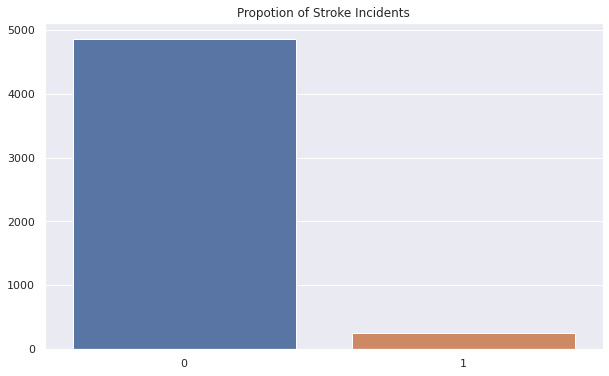

In [190]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Propotion of Stroke Incidents")

df = stroke_data["stroke"].value_counts()

# Bar chart showing number of people that did not have or did have strokes represented by 0 and 1 respectively.
sns.barplot(x=df.index, y=df.values)

The number of people that did not have stroke is significantly greater than those that had one.

<AxesSubplot:title={'center':'Number of Non-Stroke & Stroke Patients by Gender'}, xlabel='Gender', ylabel='Number of Patients'>

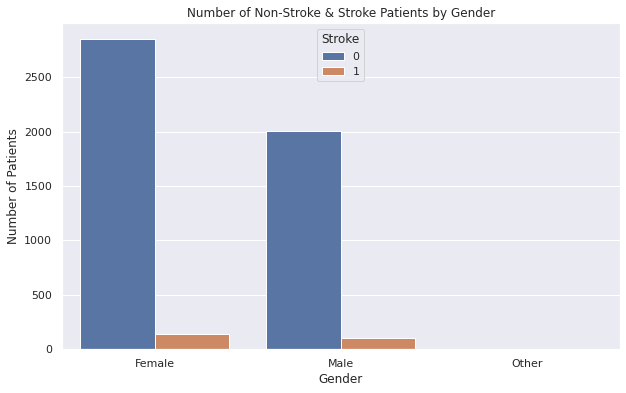

In [188]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Number of Non-Stroke & Stroke Patients by Gender")

df = stroke_data.groupby(["gender", "stroke"]).stroke.agg([len])
df = df.reset_index()
df = df.rename(columns={"len":"Number of Patients", "gender": "Gender", "stroke":"Stroke"})

# Grouped bar chart showing number of non-stroke & stroke patients by gender
sns.barplot(x=df["Gender"], y=df["Number of Patients"], hue=df["Stroke"])